In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
latent_dim = 100
batch_size = 64
epochs = 100
lr = 0.0002

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [4]:
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.74MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



데이터셋 크기: 60000
이미지 shape: torch.Size([1, 28, 28])


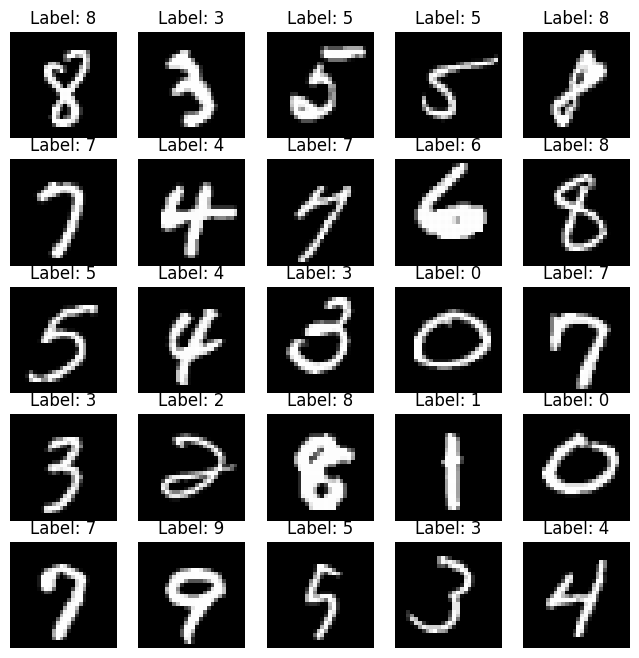

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋의 크기 확인
print("데이터셋 크기:", len(dataset))

# 첫 번째 배치의 데이터 확인
images, labels = next(iter(dataloader))

# 이미지의 shape 확인
print("이미지 shape:", images[0].shape)

# 이미지 시각화
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].squeeze().numpy(), cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.show()

In [6]:
class Generator(nn.Module):
  def __init__(self, latent_dim):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(latent_dim, 128),
        nn.LeakyReLU(0.2),
        nn.Linear(128, 256),
        nn.BatchNorm1d(256),
        nn.LeakyReLU(0.2),
        nn.Linear(256,512),
        nn.BatchNorm1d(512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 28 * 28),
        nn.Tanh()
    )
  def forward(self, z):
    return self.model(z).view(-1, 1, 28, 28)

In [7]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )
  def forward(self, img):
    return self.model(img.view(img.size(0), -1))

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

In [9]:
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

  0%|          | 0/100 [00:00<?, ?it/s]

[Epoch 0/100] [Batch 0/938] [D loss: 1.4018] [G loss: 0.7208]
[Epoch 0/100] [Batch 200/938] [D loss: 1.3205] [G loss: 0.6679]
[Epoch 0/100] [Batch 400/938] [D loss: 1.1332] [G loss: 1.1109]
[Epoch 0/100] [Batch 600/938] [D loss: 1.2932] [G loss: 0.3887]
[Epoch 0/100] [Batch 800/938] [D loss: 1.0991] [G loss: 0.8050]


  1%|          | 1/100 [00:37<1:01:32, 37.30s/it]

[Epoch 1/100] [Batch 0/938] [D loss: 1.0777] [G loss: 1.4893]
[Epoch 1/100] [Batch 200/938] [D loss: 1.1067] [G loss: 0.6707]
[Epoch 1/100] [Batch 400/938] [D loss: 1.0822] [G loss: 1.1364]
[Epoch 1/100] [Batch 600/938] [D loss: 1.0383] [G loss: 0.7027]
[Epoch 1/100] [Batch 800/938] [D loss: 1.0719] [G loss: 0.8263]


  2%|▏         | 2/100 [01:18<1:04:31, 39.50s/it]

[Epoch 2/100] [Batch 0/938] [D loss: 0.9963] [G loss: 0.8485]
[Epoch 2/100] [Batch 200/938] [D loss: 0.9064] [G loss: 0.9399]
[Epoch 2/100] [Batch 400/938] [D loss: 1.2153] [G loss: 0.6732]
[Epoch 2/100] [Batch 600/938] [D loss: 0.9213] [G loss: 1.1326]
[Epoch 2/100] [Batch 800/938] [D loss: 0.7966] [G loss: 1.4600]


  3%|▎         | 3/100 [01:57<1:03:32, 39.30s/it]

[Epoch 3/100] [Batch 0/938] [D loss: 1.3674] [G loss: 0.6947]
[Epoch 3/100] [Batch 200/938] [D loss: 0.8656] [G loss: 1.4175]
[Epoch 3/100] [Batch 400/938] [D loss: 1.1016] [G loss: 1.8452]
[Epoch 3/100] [Batch 600/938] [D loss: 0.8341] [G loss: 1.4290]
[Epoch 3/100] [Batch 800/938] [D loss: 0.9267] [G loss: 1.4012]


  4%|▍         | 4/100 [02:34<1:01:22, 38.36s/it]

[Epoch 4/100] [Batch 0/938] [D loss: 1.0753] [G loss: 1.0426]
[Epoch 4/100] [Batch 200/938] [D loss: 1.0193] [G loss: 1.3423]
[Epoch 4/100] [Batch 400/938] [D loss: 0.8675] [G loss: 1.0196]
[Epoch 4/100] [Batch 600/938] [D loss: 0.9880] [G loss: 0.9901]
[Epoch 4/100] [Batch 800/938] [D loss: 1.1476] [G loss: 1.8539]


  5%|▌         | 5/100 [03:11<59:53, 37.83s/it]  

[Epoch 5/100] [Batch 0/938] [D loss: 1.3225] [G loss: 1.7739]
[Epoch 5/100] [Batch 200/938] [D loss: 1.2380] [G loss: 0.7361]
[Epoch 5/100] [Batch 400/938] [D loss: 1.0869] [G loss: 1.0170]
[Epoch 5/100] [Batch 600/938] [D loss: 1.1261] [G loss: 1.4798]
[Epoch 5/100] [Batch 800/938] [D loss: 0.9812] [G loss: 1.4638]


  6%|▌         | 6/100 [03:48<58:48, 37.54s/it]

[Epoch 6/100] [Batch 0/938] [D loss: 1.0817] [G loss: 1.4004]
[Epoch 6/100] [Batch 200/938] [D loss: 1.1379] [G loss: 1.6487]
[Epoch 6/100] [Batch 400/938] [D loss: 1.0360] [G loss: 1.5174]
[Epoch 6/100] [Batch 600/938] [D loss: 1.0361] [G loss: 0.8882]
[Epoch 6/100] [Batch 800/938] [D loss: 1.1453] [G loss: 1.7286]


  7%|▋         | 7/100 [04:25<57:53, 37.35s/it]

[Epoch 7/100] [Batch 0/938] [D loss: 1.1202] [G loss: 1.1327]
[Epoch 7/100] [Batch 200/938] [D loss: 1.1716] [G loss: 0.7501]
[Epoch 7/100] [Batch 400/938] [D loss: 1.1748] [G loss: 0.7870]
[Epoch 7/100] [Batch 600/938] [D loss: 1.2295] [G loss: 0.6365]
[Epoch 7/100] [Batch 800/938] [D loss: 1.1795] [G loss: 1.3797]


  8%|▊         | 8/100 [05:02<57:13, 37.33s/it]

[Epoch 8/100] [Batch 0/938] [D loss: 1.5010] [G loss: 1.9196]
[Epoch 8/100] [Batch 200/938] [D loss: 1.1849] [G loss: 1.2094]
[Epoch 8/100] [Batch 400/938] [D loss: 1.0500] [G loss: 1.0172]
[Epoch 8/100] [Batch 600/938] [D loss: 1.0566] [G loss: 0.8867]
[Epoch 8/100] [Batch 800/938] [D loss: 1.2965] [G loss: 0.5125]


  9%|▉         | 9/100 [05:39<56:40, 37.37s/it]

[Epoch 9/100] [Batch 0/938] [D loss: 1.1532] [G loss: 1.4498]
[Epoch 9/100] [Batch 200/938] [D loss: 0.9962] [G loss: 1.1388]
[Epoch 9/100] [Batch 400/938] [D loss: 1.1820] [G loss: 0.8788]
[Epoch 9/100] [Batch 600/938] [D loss: 1.1346] [G loss: 1.0959]
[Epoch 9/100] [Batch 800/938] [D loss: 1.1801] [G loss: 0.9881]
Epoch [10/100]  D Loss: 1.0990  G Loss: 1.1602


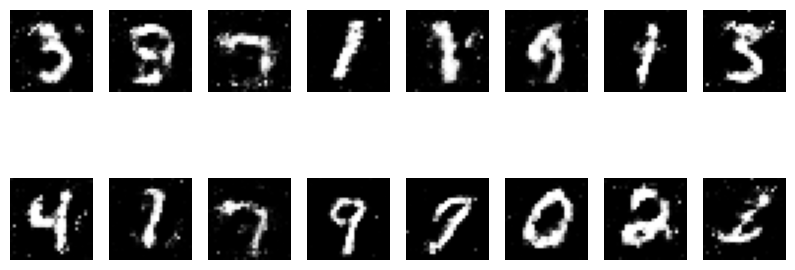

 10%|█         | 10/100 [06:17<56:15, 37.51s/it]

[Epoch 10/100] [Batch 0/938] [D loss: 1.1299] [G loss: 1.1145]
[Epoch 10/100] [Batch 200/938] [D loss: 1.1325] [G loss: 1.0100]
[Epoch 10/100] [Batch 400/938] [D loss: 1.1045] [G loss: 1.3066]
[Epoch 10/100] [Batch 600/938] [D loss: 1.1507] [G loss: 0.8167]
[Epoch 10/100] [Batch 800/938] [D loss: 1.0962] [G loss: 0.9557]


 11%|█         | 11/100 [06:55<55:33, 37.46s/it]

[Epoch 11/100] [Batch 0/938] [D loss: 1.2246] [G loss: 1.5398]
[Epoch 11/100] [Batch 200/938] [D loss: 1.2523] [G loss: 1.5468]
[Epoch 11/100] [Batch 400/938] [D loss: 1.1270] [G loss: 0.8305]
[Epoch 11/100] [Batch 600/938] [D loss: 1.2629] [G loss: 1.3854]
[Epoch 11/100] [Batch 800/938] [D loss: 1.3249] [G loss: 1.7065]


 12%|█▏        | 12/100 [07:32<54:49, 37.38s/it]

[Epoch 12/100] [Batch 0/938] [D loss: 1.2566] [G loss: 1.8592]
[Epoch 12/100] [Batch 200/938] [D loss: 1.0811] [G loss: 1.7426]
[Epoch 12/100] [Batch 400/938] [D loss: 1.3985] [G loss: 0.5572]
[Epoch 12/100] [Batch 600/938] [D loss: 1.2078] [G loss: 0.6934]
[Epoch 12/100] [Batch 800/938] [D loss: 1.2642] [G loss: 0.6168]


 13%|█▎        | 13/100 [08:09<54:07, 37.33s/it]

[Epoch 13/100] [Batch 0/938] [D loss: 1.0443] [G loss: 1.0606]
[Epoch 13/100] [Batch 200/938] [D loss: 1.5411] [G loss: 0.4961]
[Epoch 13/100] [Batch 400/938] [D loss: 1.1340] [G loss: 0.7806]
[Epoch 13/100] [Batch 600/938] [D loss: 1.2279] [G loss: 1.6568]
[Epoch 13/100] [Batch 800/938] [D loss: 1.1230] [G loss: 1.1708]


 14%|█▍        | 14/100 [08:46<53:31, 37.34s/it]

[Epoch 14/100] [Batch 0/938] [D loss: 1.1603] [G loss: 0.7340]
[Epoch 14/100] [Batch 200/938] [D loss: 1.2373] [G loss: 1.2145]
[Epoch 14/100] [Batch 400/938] [D loss: 1.1602] [G loss: 1.0011]
[Epoch 14/100] [Batch 600/938] [D loss: 1.1379] [G loss: 0.9148]
[Epoch 14/100] [Batch 800/938] [D loss: 1.1581] [G loss: 1.0582]


 15%|█▌        | 15/100 [09:24<52:51, 37.32s/it]

[Epoch 15/100] [Batch 0/938] [D loss: 1.2050] [G loss: 1.4990]
[Epoch 15/100] [Batch 200/938] [D loss: 1.2787] [G loss: 1.1507]
[Epoch 15/100] [Batch 400/938] [D loss: 1.0431] [G loss: 0.9412]
[Epoch 15/100] [Batch 600/938] [D loss: 1.2595] [G loss: 1.0624]
[Epoch 15/100] [Batch 800/938] [D loss: 1.0474] [G loss: 0.9000]


 16%|█▌        | 16/100 [10:01<52:12, 37.29s/it]

[Epoch 16/100] [Batch 0/938] [D loss: 1.1594] [G loss: 1.1322]
[Epoch 16/100] [Batch 200/938] [D loss: 1.2012] [G loss: 1.3560]
[Epoch 16/100] [Batch 400/938] [D loss: 1.3227] [G loss: 0.5405]
[Epoch 16/100] [Batch 600/938] [D loss: 1.1780] [G loss: 1.3771]
[Epoch 16/100] [Batch 800/938] [D loss: 1.2021] [G loss: 1.4070]


 17%|█▋        | 17/100 [10:38<51:31, 37.25s/it]

[Epoch 17/100] [Batch 0/938] [D loss: 1.1230] [G loss: 1.0055]
[Epoch 17/100] [Batch 200/938] [D loss: 1.1127] [G loss: 1.3809]
[Epoch 17/100] [Batch 400/938] [D loss: 1.1552] [G loss: 0.9895]
[Epoch 17/100] [Batch 600/938] [D loss: 1.2186] [G loss: 1.3108]
[Epoch 17/100] [Batch 800/938] [D loss: 1.0864] [G loss: 1.1331]


 18%|█▊        | 18/100 [11:15<50:55, 37.26s/it]

[Epoch 18/100] [Batch 0/938] [D loss: 1.1361] [G loss: 1.4538]
[Epoch 18/100] [Batch 200/938] [D loss: 1.2176] [G loss: 1.0878]
[Epoch 18/100] [Batch 400/938] [D loss: 1.1566] [G loss: 1.0827]
[Epoch 18/100] [Batch 600/938] [D loss: 1.1883] [G loss: 0.6879]
[Epoch 18/100] [Batch 800/938] [D loss: 1.1586] [G loss: 0.9725]


 19%|█▉        | 19/100 [11:53<50:17, 37.26s/it]

[Epoch 19/100] [Batch 0/938] [D loss: 1.2048] [G loss: 0.7213]
[Epoch 19/100] [Batch 200/938] [D loss: 1.1475] [G loss: 1.0069]
[Epoch 19/100] [Batch 400/938] [D loss: 1.1132] [G loss: 0.6951]
[Epoch 19/100] [Batch 600/938] [D loss: 1.1305] [G loss: 0.9570]
[Epoch 19/100] [Batch 800/938] [D loss: 1.2355] [G loss: 0.6974]
Epoch [20/100]  D Loss: 1.1525  G Loss: 1.1304


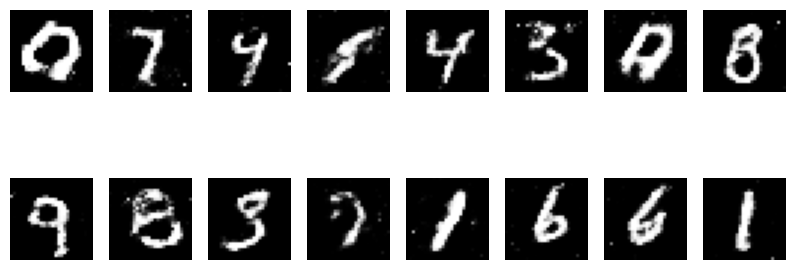

 20%|██        | 20/100 [12:30<49:50, 37.38s/it]

[Epoch 20/100] [Batch 0/938] [D loss: 1.0968] [G loss: 0.9518]
[Epoch 20/100] [Batch 200/938] [D loss: 1.2155] [G loss: 1.0298]
[Epoch 20/100] [Batch 400/938] [D loss: 1.0711] [G loss: 1.3120]
[Epoch 20/100] [Batch 600/938] [D loss: 1.1272] [G loss: 1.1052]
[Epoch 20/100] [Batch 800/938] [D loss: 1.2520] [G loss: 1.2822]


 21%|██        | 21/100 [13:07<49:11, 37.36s/it]

[Epoch 21/100] [Batch 0/938] [D loss: 1.2595] [G loss: 1.1145]
[Epoch 21/100] [Batch 200/938] [D loss: 1.2515] [G loss: 0.9472]
[Epoch 21/100] [Batch 400/938] [D loss: 1.1238] [G loss: 1.2172]
[Epoch 21/100] [Batch 600/938] [D loss: 1.1215] [G loss: 0.8160]
[Epoch 21/100] [Batch 800/938] [D loss: 1.2414] [G loss: 1.0881]


 22%|██▏       | 22/100 [13:45<48:33, 37.36s/it]

[Epoch 22/100] [Batch 0/938] [D loss: 1.1201] [G loss: 1.2531]
[Epoch 22/100] [Batch 200/938] [D loss: 1.1248] [G loss: 1.2321]
[Epoch 22/100] [Batch 400/938] [D loss: 1.2109] [G loss: 1.1077]
[Epoch 22/100] [Batch 600/938] [D loss: 1.1663] [G loss: 1.2636]
[Epoch 22/100] [Batch 800/938] [D loss: 1.2031] [G loss: 0.6917]


 23%|██▎       | 23/100 [14:22<48:02, 37.43s/it]

[Epoch 23/100] [Batch 0/938] [D loss: 1.2110] [G loss: 0.9215]
[Epoch 23/100] [Batch 200/938] [D loss: 1.0649] [G loss: 1.1183]
[Epoch 23/100] [Batch 400/938] [D loss: 1.1413] [G loss: 0.9931]
[Epoch 23/100] [Batch 600/938] [D loss: 1.1855] [G loss: 0.9874]
[Epoch 23/100] [Batch 800/938] [D loss: 1.0786] [G loss: 1.1080]


 24%|██▍       | 24/100 [15:00<47:23, 37.42s/it]

[Epoch 24/100] [Batch 0/938] [D loss: 1.2116] [G loss: 1.2621]
[Epoch 24/100] [Batch 200/938] [D loss: 1.2024] [G loss: 1.2558]
[Epoch 24/100] [Batch 400/938] [D loss: 1.2087] [G loss: 1.4691]
[Epoch 24/100] [Batch 600/938] [D loss: 1.2342] [G loss: 1.1811]
[Epoch 24/100] [Batch 800/938] [D loss: 1.1822] [G loss: 0.7557]


 25%|██▌       | 25/100 [15:37<46:46, 37.43s/it]

[Epoch 25/100] [Batch 0/938] [D loss: 1.1508] [G loss: 1.4822]
[Epoch 25/100] [Batch 200/938] [D loss: 1.0587] [G loss: 1.4636]
[Epoch 25/100] [Batch 400/938] [D loss: 1.2024] [G loss: 0.8664]
[Epoch 25/100] [Batch 600/938] [D loss: 1.2971] [G loss: 1.4266]
[Epoch 25/100] [Batch 800/938] [D loss: 1.1324] [G loss: 1.3305]


 26%|██▌       | 26/100 [16:15<46:09, 37.42s/it]

[Epoch 26/100] [Batch 0/938] [D loss: 1.3798] [G loss: 0.6774]
[Epoch 26/100] [Batch 200/938] [D loss: 1.1894] [G loss: 0.8412]
[Epoch 26/100] [Batch 400/938] [D loss: 1.1088] [G loss: 0.9725]
[Epoch 26/100] [Batch 600/938] [D loss: 1.1620] [G loss: 1.2616]
[Epoch 26/100] [Batch 800/938] [D loss: 1.2396] [G loss: 0.6220]


 27%|██▋       | 27/100 [16:52<45:29, 37.38s/it]

[Epoch 27/100] [Batch 0/938] [D loss: 1.0938] [G loss: 0.9283]
[Epoch 27/100] [Batch 200/938] [D loss: 1.1357] [G loss: 1.0048]
[Epoch 27/100] [Batch 400/938] [D loss: 1.0840] [G loss: 1.1046]
[Epoch 27/100] [Batch 600/938] [D loss: 1.2919] [G loss: 1.5077]
[Epoch 27/100] [Batch 800/938] [D loss: 1.2010] [G loss: 1.4649]


 28%|██▊       | 28/100 [17:30<44:57, 37.47s/it]

[Epoch 28/100] [Batch 0/938] [D loss: 1.3040] [G loss: 1.8275]
[Epoch 28/100] [Batch 200/938] [D loss: 1.2551] [G loss: 1.1932]
[Epoch 28/100] [Batch 400/938] [D loss: 1.2484] [G loss: 0.8390]
[Epoch 28/100] [Batch 600/938] [D loss: 1.1173] [G loss: 1.3922]
[Epoch 28/100] [Batch 800/938] [D loss: 1.2497] [G loss: 1.1487]


 29%|██▉       | 29/100 [18:07<44:21, 37.49s/it]

[Epoch 29/100] [Batch 0/938] [D loss: 1.0832] [G loss: 1.4256]
[Epoch 29/100] [Batch 200/938] [D loss: 1.1663] [G loss: 1.0789]
[Epoch 29/100] [Batch 400/938] [D loss: 1.0882] [G loss: 0.9465]
[Epoch 29/100] [Batch 600/938] [D loss: 1.3088] [G loss: 0.7051]
[Epoch 29/100] [Batch 800/938] [D loss: 1.3216] [G loss: 0.6901]
Epoch [30/100]  D Loss: 1.1098  G Loss: 1.5412


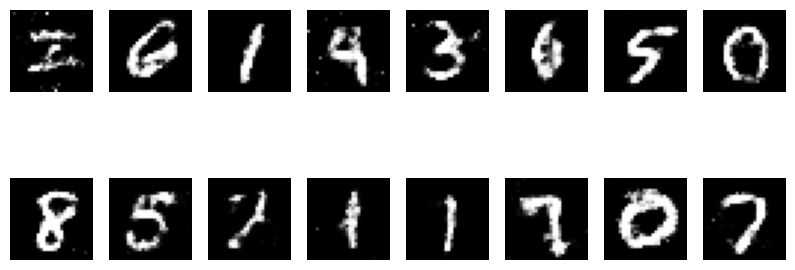

 30%|███       | 30/100 [18:45<43:50, 37.57s/it]

[Epoch 30/100] [Batch 0/938] [D loss: 1.2597] [G loss: 0.7942]
[Epoch 30/100] [Batch 200/938] [D loss: 1.0827] [G loss: 1.0798]
[Epoch 30/100] [Batch 400/938] [D loss: 1.1153] [G loss: 1.0033]
[Epoch 30/100] [Batch 600/938] [D loss: 1.1713] [G loss: 0.6139]
[Epoch 30/100] [Batch 800/938] [D loss: 1.0457] [G loss: 1.0112]


 31%|███       | 31/100 [19:23<43:12, 37.58s/it]

[Epoch 31/100] [Batch 0/938] [D loss: 1.1890] [G loss: 1.6656]
[Epoch 31/100] [Batch 200/938] [D loss: 1.1528] [G loss: 0.7888]
[Epoch 31/100] [Batch 400/938] [D loss: 1.1290] [G loss: 1.0515]
[Epoch 31/100] [Batch 600/938] [D loss: 1.2448] [G loss: 0.7347]
[Epoch 31/100] [Batch 800/938] [D loss: 1.1462] [G loss: 0.8779]


 32%|███▏      | 32/100 [20:00<42:34, 37.57s/it]

[Epoch 32/100] [Batch 0/938] [D loss: 1.0923] [G loss: 1.2389]
[Epoch 32/100] [Batch 200/938] [D loss: 1.1707] [G loss: 0.9116]
[Epoch 32/100] [Batch 400/938] [D loss: 1.1925] [G loss: 1.5643]
[Epoch 32/100] [Batch 600/938] [D loss: 1.0379] [G loss: 1.2238]
[Epoch 32/100] [Batch 800/938] [D loss: 1.0681] [G loss: 1.3722]


 33%|███▎      | 33/100 [20:38<41:54, 37.54s/it]

[Epoch 33/100] [Batch 0/938] [D loss: 1.2431] [G loss: 0.9723]
[Epoch 33/100] [Batch 200/938] [D loss: 1.0195] [G loss: 1.0715]
[Epoch 33/100] [Batch 400/938] [D loss: 1.0806] [G loss: 1.1988]
[Epoch 33/100] [Batch 600/938] [D loss: 1.3911] [G loss: 1.7869]
[Epoch 33/100] [Batch 800/938] [D loss: 1.1167] [G loss: 1.0657]


 34%|███▍      | 34/100 [21:15<41:19, 37.57s/it]

[Epoch 34/100] [Batch 0/938] [D loss: 1.1971] [G loss: 1.4442]
[Epoch 34/100] [Batch 200/938] [D loss: 1.1739] [G loss: 0.9987]
[Epoch 34/100] [Batch 400/938] [D loss: 1.1275] [G loss: 1.3020]
[Epoch 34/100] [Batch 600/938] [D loss: 1.1094] [G loss: 1.2552]
[Epoch 34/100] [Batch 800/938] [D loss: 1.0838] [G loss: 0.9632]


 35%|███▌      | 35/100 [21:53<40:40, 37.55s/it]

[Epoch 35/100] [Batch 0/938] [D loss: 1.4042] [G loss: 1.4676]
[Epoch 35/100] [Batch 200/938] [D loss: 1.2753] [G loss: 1.3728]
[Epoch 35/100] [Batch 400/938] [D loss: 1.2273] [G loss: 0.9878]
[Epoch 35/100] [Batch 600/938] [D loss: 1.0955] [G loss: 1.0752]
[Epoch 35/100] [Batch 800/938] [D loss: 1.1604] [G loss: 1.2738]


 36%|███▌      | 36/100 [22:30<40:02, 37.54s/it]

[Epoch 36/100] [Batch 0/938] [D loss: 1.2139] [G loss: 1.4226]
[Epoch 36/100] [Batch 200/938] [D loss: 1.1503] [G loss: 1.1279]
[Epoch 36/100] [Batch 400/938] [D loss: 1.0979] [G loss: 0.9229]
[Epoch 36/100] [Batch 600/938] [D loss: 1.2653] [G loss: 0.8195]
[Epoch 36/100] [Batch 800/938] [D loss: 1.1265] [G loss: 1.3305]


 37%|███▋      | 37/100 [23:08<39:22, 37.50s/it]

[Epoch 37/100] [Batch 0/938] [D loss: 1.1602] [G loss: 0.9220]
[Epoch 37/100] [Batch 200/938] [D loss: 1.0915] [G loss: 1.3979]
[Epoch 37/100] [Batch 400/938] [D loss: 1.2808] [G loss: 1.7263]
[Epoch 37/100] [Batch 600/938] [D loss: 1.1065] [G loss: 1.3272]
[Epoch 37/100] [Batch 800/938] [D loss: 1.2228] [G loss: 0.8500]


 38%|███▊      | 38/100 [23:45<38:45, 37.51s/it]

[Epoch 38/100] [Batch 0/938] [D loss: 1.2728] [G loss: 1.1851]
[Epoch 38/100] [Batch 200/938] [D loss: 1.2228] [G loss: 0.7881]
[Epoch 38/100] [Batch 400/938] [D loss: 1.1273] [G loss: 0.9340]
[Epoch 38/100] [Batch 600/938] [D loss: 1.0216] [G loss: 1.2389]
[Epoch 38/100] [Batch 800/938] [D loss: 1.1993] [G loss: 0.9795]


 39%|███▉      | 39/100 [24:23<38:10, 37.55s/it]

[Epoch 39/100] [Batch 0/938] [D loss: 1.1279] [G loss: 1.1084]
[Epoch 39/100] [Batch 200/938] [D loss: 1.2420] [G loss: 1.5718]
[Epoch 39/100] [Batch 400/938] [D loss: 1.1837] [G loss: 0.8591]
[Epoch 39/100] [Batch 600/938] [D loss: 1.1502] [G loss: 1.0717]
[Epoch 39/100] [Batch 800/938] [D loss: 1.0187] [G loss: 1.4207]
Epoch [40/100]  D Loss: 1.2070  G Loss: 1.1720


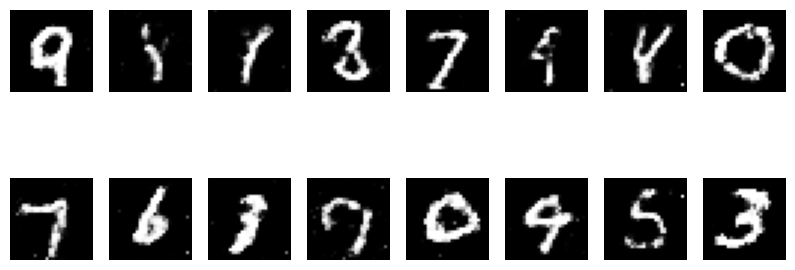

 40%|████      | 40/100 [25:01<37:42, 37.70s/it]

[Epoch 40/100] [Batch 0/938] [D loss: 1.2063] [G loss: 1.0419]
[Epoch 40/100] [Batch 200/938] [D loss: 1.2039] [G loss: 0.9176]
[Epoch 40/100] [Batch 400/938] [D loss: 1.1685] [G loss: 0.9654]
[Epoch 40/100] [Batch 600/938] [D loss: 1.0925] [G loss: 0.7439]
[Epoch 40/100] [Batch 800/938] [D loss: 1.1644] [G loss: 1.0932]


 41%|████      | 41/100 [25:38<37:01, 37.65s/it]

[Epoch 41/100] [Batch 0/938] [D loss: 1.0845] [G loss: 1.1858]
[Epoch 41/100] [Batch 200/938] [D loss: 1.0976] [G loss: 1.3000]
[Epoch 41/100] [Batch 400/938] [D loss: 1.1792] [G loss: 0.7996]
[Epoch 41/100] [Batch 600/938] [D loss: 1.1349] [G loss: 1.2014]
[Epoch 41/100] [Batch 800/938] [D loss: 1.0967] [G loss: 1.1569]


 42%|████▏     | 42/100 [26:16<36:22, 37.63s/it]

[Epoch 42/100] [Batch 0/938] [D loss: 1.1712] [G loss: 1.3471]
[Epoch 42/100] [Batch 200/938] [D loss: 1.1192] [G loss: 1.4338]
[Epoch 42/100] [Batch 400/938] [D loss: 1.2460] [G loss: 1.4098]
[Epoch 42/100] [Batch 600/938] [D loss: 1.0128] [G loss: 1.1372]
[Epoch 42/100] [Batch 800/938] [D loss: 1.1696] [G loss: 0.7486]


 43%|████▎     | 43/100 [26:54<35:43, 37.60s/it]

[Epoch 43/100] [Batch 0/938] [D loss: 1.0782] [G loss: 1.2525]
[Epoch 43/100] [Batch 200/938] [D loss: 1.0961] [G loss: 1.2377]
[Epoch 43/100] [Batch 400/938] [D loss: 1.1339] [G loss: 1.1080]
[Epoch 43/100] [Batch 600/938] [D loss: 1.0960] [G loss: 0.9108]
[Epoch 43/100] [Batch 800/938] [D loss: 1.1499] [G loss: 0.9611]


 44%|████▍     | 44/100 [27:31<35:05, 37.60s/it]

[Epoch 44/100] [Batch 0/938] [D loss: 1.0874] [G loss: 1.1714]
[Epoch 44/100] [Batch 200/938] [D loss: 1.2181] [G loss: 1.1996]
[Epoch 44/100] [Batch 400/938] [D loss: 1.1627] [G loss: 1.2973]
[Epoch 44/100] [Batch 600/938] [D loss: 1.0878] [G loss: 1.2634]
[Epoch 44/100] [Batch 800/938] [D loss: 1.1352] [G loss: 1.3366]


 45%|████▌     | 45/100 [28:09<34:28, 37.60s/it]

[Epoch 45/100] [Batch 0/938] [D loss: 1.2886] [G loss: 1.8440]
[Epoch 45/100] [Batch 200/938] [D loss: 1.2703] [G loss: 1.4631]
[Epoch 45/100] [Batch 400/938] [D loss: 1.2434] [G loss: 1.6199]
[Epoch 45/100] [Batch 600/938] [D loss: 1.0711] [G loss: 1.0111]
[Epoch 45/100] [Batch 800/938] [D loss: 1.2215] [G loss: 0.8667]


 46%|████▌     | 46/100 [28:46<33:51, 37.61s/it]

[Epoch 46/100] [Batch 0/938] [D loss: 1.1984] [G loss: 1.5515]
[Epoch 46/100] [Batch 200/938] [D loss: 1.2687] [G loss: 1.1608]
[Epoch 46/100] [Batch 400/938] [D loss: 1.2787] [G loss: 1.5240]
[Epoch 46/100] [Batch 600/938] [D loss: 1.1394] [G loss: 1.1879]
[Epoch 46/100] [Batch 800/938] [D loss: 1.1121] [G loss: 1.1917]


 47%|████▋     | 47/100 [29:24<33:11, 37.58s/it]

[Epoch 47/100] [Batch 0/938] [D loss: 1.1759] [G loss: 0.7265]
[Epoch 47/100] [Batch 200/938] [D loss: 1.0613] [G loss: 1.6654]
[Epoch 47/100] [Batch 400/938] [D loss: 1.1507] [G loss: 1.3245]
[Epoch 47/100] [Batch 600/938] [D loss: 1.1304] [G loss: 1.4657]
[Epoch 47/100] [Batch 800/938] [D loss: 1.1494] [G loss: 1.2354]


 48%|████▊     | 48/100 [30:01<32:33, 37.56s/it]

[Epoch 48/100] [Batch 0/938] [D loss: 1.2048] [G loss: 1.2173]
[Epoch 48/100] [Batch 200/938] [D loss: 1.1561] [G loss: 1.2677]
[Epoch 48/100] [Batch 400/938] [D loss: 1.1538] [G loss: 1.0658]
[Epoch 48/100] [Batch 600/938] [D loss: 0.9895] [G loss: 1.0572]
[Epoch 48/100] [Batch 800/938] [D loss: 1.2369] [G loss: 0.7524]


 49%|████▉     | 49/100 [30:39<31:58, 37.61s/it]

[Epoch 49/100] [Batch 0/938] [D loss: 1.1417] [G loss: 1.4375]
[Epoch 49/100] [Batch 200/938] [D loss: 1.0958] [G loss: 1.1678]
[Epoch 49/100] [Batch 400/938] [D loss: 1.1261] [G loss: 1.4369]
[Epoch 49/100] [Batch 600/938] [D loss: 1.0221] [G loss: 1.2353]
[Epoch 49/100] [Batch 800/938] [D loss: 1.0596] [G loss: 1.4505]
Epoch [50/100]  D Loss: 1.2886  G Loss: 0.8241


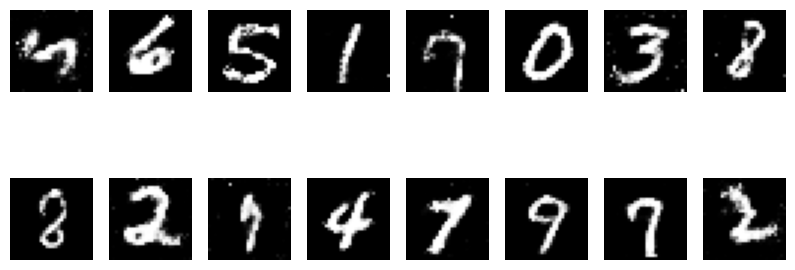

 50%|█████     | 50/100 [31:17<31:27, 37.75s/it]

[Epoch 50/100] [Batch 0/938] [D loss: 1.0588] [G loss: 1.6628]
[Epoch 50/100] [Batch 200/938] [D loss: 1.0584] [G loss: 1.0690]
[Epoch 50/100] [Batch 400/938] [D loss: 1.1437] [G loss: 1.4837]
[Epoch 50/100] [Batch 600/938] [D loss: 1.0608] [G loss: 1.0663]
[Epoch 50/100] [Batch 800/938] [D loss: 1.1126] [G loss: 1.3415]


 51%|█████     | 51/100 [31:55<30:51, 37.79s/it]

[Epoch 51/100] [Batch 0/938] [D loss: 1.0017] [G loss: 1.1681]
[Epoch 51/100] [Batch 200/938] [D loss: 1.1643] [G loss: 1.1037]
[Epoch 51/100] [Batch 400/938] [D loss: 1.2393] [G loss: 1.2110]
[Epoch 51/100] [Batch 600/938] [D loss: 1.2038] [G loss: 0.8409]
[Epoch 51/100] [Batch 800/938] [D loss: 1.0847] [G loss: 0.9801]


 52%|█████▏    | 52/100 [32:33<30:14, 37.80s/it]

[Epoch 52/100] [Batch 0/938] [D loss: 1.1108] [G loss: 1.2567]
[Epoch 52/100] [Batch 200/938] [D loss: 1.0806] [G loss: 1.3130]
[Epoch 52/100] [Batch 400/938] [D loss: 1.1260] [G loss: 1.2166]
[Epoch 52/100] [Batch 600/938] [D loss: 1.0729] [G loss: 1.1647]
[Epoch 52/100] [Batch 800/938] [D loss: 1.1180] [G loss: 0.9782]


 53%|█████▎    | 53/100 [33:11<29:34, 37.75s/it]

[Epoch 53/100] [Batch 0/938] [D loss: 1.3465] [G loss: 1.8049]
[Epoch 53/100] [Batch 200/938] [D loss: 1.1379] [G loss: 1.2356]
[Epoch 53/100] [Batch 400/938] [D loss: 1.2232] [G loss: 1.0713]
[Epoch 53/100] [Batch 600/938] [D loss: 1.0513] [G loss: 1.5279]
[Epoch 53/100] [Batch 800/938] [D loss: 1.1269] [G loss: 0.9073]


 54%|█████▍    | 54/100 [33:48<28:55, 37.73s/it]

[Epoch 54/100] [Batch 0/938] [D loss: 1.1005] [G loss: 0.9003]
[Epoch 54/100] [Batch 200/938] [D loss: 1.1474] [G loss: 1.5037]
[Epoch 54/100] [Batch 400/938] [D loss: 1.0612] [G loss: 1.3140]
[Epoch 54/100] [Batch 600/938] [D loss: 1.0089] [G loss: 1.1605]
[Epoch 54/100] [Batch 800/938] [D loss: 1.1703] [G loss: 1.5500]


 55%|█████▌    | 55/100 [34:26<28:16, 37.71s/it]

[Epoch 55/100] [Batch 0/938] [D loss: 1.2038] [G loss: 1.6875]
[Epoch 55/100] [Batch 200/938] [D loss: 1.1029] [G loss: 1.2822]
[Epoch 55/100] [Batch 400/938] [D loss: 1.0904] [G loss: 1.0355]
[Epoch 55/100] [Batch 600/938] [D loss: 1.1527] [G loss: 1.0556]
[Epoch 55/100] [Batch 800/938] [D loss: 1.1180] [G loss: 1.3286]


 56%|█████▌    | 56/100 [35:03<27:37, 37.67s/it]

[Epoch 56/100] [Batch 0/938] [D loss: 1.1693] [G loss: 1.1269]
[Epoch 56/100] [Batch 200/938] [D loss: 1.0137] [G loss: 1.0883]
[Epoch 56/100] [Batch 400/938] [D loss: 1.0968] [G loss: 1.0076]
[Epoch 56/100] [Batch 600/938] [D loss: 1.0701] [G loss: 1.3226]
[Epoch 56/100] [Batch 800/938] [D loss: 1.1896] [G loss: 0.8472]


 57%|█████▋    | 57/100 [35:41<26:56, 37.59s/it]

[Epoch 57/100] [Batch 0/938] [D loss: 1.2786] [G loss: 1.7897]
[Epoch 57/100] [Batch 200/938] [D loss: 1.2139] [G loss: 0.8095]
[Epoch 57/100] [Batch 400/938] [D loss: 1.1712] [G loss: 1.3319]
[Epoch 57/100] [Batch 600/938] [D loss: 1.1139] [G loss: 1.2487]
[Epoch 57/100] [Batch 800/938] [D loss: 1.0810] [G loss: 1.4964]


 58%|█████▊    | 58/100 [36:18<26:17, 37.57s/it]

[Epoch 58/100] [Batch 0/938] [D loss: 1.0360] [G loss: 1.2069]
[Epoch 58/100] [Batch 200/938] [D loss: 1.1415] [G loss: 1.4692]
[Epoch 58/100] [Batch 400/938] [D loss: 1.1662] [G loss: 0.9580]
[Epoch 58/100] [Batch 600/938] [D loss: 1.1938] [G loss: 1.5350]
[Epoch 58/100] [Batch 800/938] [D loss: 1.0567] [G loss: 1.4391]


 59%|█████▉    | 59/100 [36:56<25:39, 37.54s/it]

[Epoch 59/100] [Batch 0/938] [D loss: 0.9942] [G loss: 1.5568]
[Epoch 59/100] [Batch 200/938] [D loss: 1.0215] [G loss: 1.2562]
[Epoch 59/100] [Batch 400/938] [D loss: 1.0775] [G loss: 1.3004]
[Epoch 59/100] [Batch 600/938] [D loss: 1.1091] [G loss: 1.3147]
[Epoch 59/100] [Batch 800/938] [D loss: 1.0720] [G loss: 1.1390]
Epoch [60/100]  D Loss: 1.1810  G Loss: 1.2115


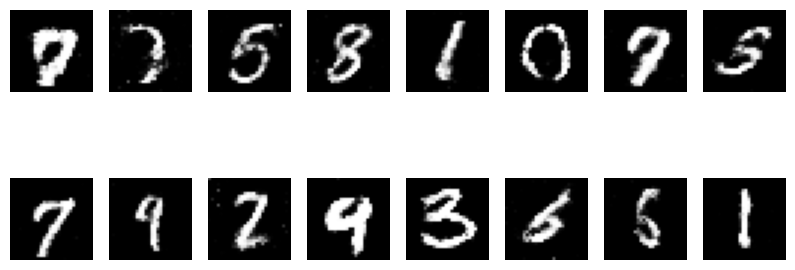

 60%|██████    | 60/100 [37:34<25:05, 37.64s/it]

[Epoch 60/100] [Batch 0/938] [D loss: 1.0021] [G loss: 1.2374]
[Epoch 60/100] [Batch 200/938] [D loss: 1.1219] [G loss: 1.0961]
[Epoch 60/100] [Batch 400/938] [D loss: 1.0004] [G loss: 1.3139]
[Epoch 60/100] [Batch 600/938] [D loss: 1.1376] [G loss: 1.2884]
[Epoch 60/100] [Batch 800/938] [D loss: 1.0516] [G loss: 0.9591]


 61%|██████    | 61/100 [38:11<24:28, 37.66s/it]

[Epoch 61/100] [Batch 0/938] [D loss: 1.0598] [G loss: 1.2784]
[Epoch 61/100] [Batch 200/938] [D loss: 1.2636] [G loss: 1.3855]
[Epoch 61/100] [Batch 400/938] [D loss: 1.0852] [G loss: 1.1627]
[Epoch 61/100] [Batch 600/938] [D loss: 1.2486] [G loss: 1.0866]
[Epoch 61/100] [Batch 800/938] [D loss: 0.9881] [G loss: 1.3218]


 62%|██████▏   | 62/100 [38:49<23:50, 37.64s/it]

[Epoch 62/100] [Batch 0/938] [D loss: 1.0989] [G loss: 0.9637]
[Epoch 62/100] [Batch 200/938] [D loss: 1.0018] [G loss: 1.4972]
[Epoch 62/100] [Batch 400/938] [D loss: 1.2478] [G loss: 0.9329]
[Epoch 62/100] [Batch 600/938] [D loss: 1.2338] [G loss: 1.2988]
[Epoch 62/100] [Batch 800/938] [D loss: 1.1538] [G loss: 1.0514]


 63%|██████▎   | 63/100 [39:27<23:11, 37.60s/it]

[Epoch 63/100] [Batch 0/938] [D loss: 0.9554] [G loss: 1.2723]
[Epoch 63/100] [Batch 200/938] [D loss: 1.2059] [G loss: 1.0842]
[Epoch 63/100] [Batch 400/938] [D loss: 0.9629] [G loss: 1.2090]
[Epoch 63/100] [Batch 600/938] [D loss: 1.1406] [G loss: 1.1317]
[Epoch 63/100] [Batch 800/938] [D loss: 1.0861] [G loss: 1.4422]


 64%|██████▍   | 64/100 [40:04<22:34, 37.61s/it]

[Epoch 64/100] [Batch 0/938] [D loss: 1.0247] [G loss: 1.1177]
[Epoch 64/100] [Batch 200/938] [D loss: 1.0736] [G loss: 1.1752]
[Epoch 64/100] [Batch 400/938] [D loss: 1.0109] [G loss: 1.2804]
[Epoch 64/100] [Batch 600/938] [D loss: 1.2041] [G loss: 0.8513]
[Epoch 64/100] [Batch 800/938] [D loss: 1.0543] [G loss: 1.6481]


 65%|██████▌   | 65/100 [40:42<21:55, 37.59s/it]

[Epoch 65/100] [Batch 0/938] [D loss: 1.0370] [G loss: 1.5231]
[Epoch 65/100] [Batch 200/938] [D loss: 1.0941] [G loss: 1.3869]
[Epoch 65/100] [Batch 400/938] [D loss: 1.0944] [G loss: 1.2717]
[Epoch 65/100] [Batch 600/938] [D loss: 1.0589] [G loss: 1.3147]
[Epoch 65/100] [Batch 800/938] [D loss: 1.1773] [G loss: 1.1248]


 66%|██████▌   | 66/100 [41:19<21:16, 37.55s/it]

[Epoch 66/100] [Batch 0/938] [D loss: 1.0615] [G loss: 1.3640]
[Epoch 66/100] [Batch 200/938] [D loss: 1.0867] [G loss: 1.2591]
[Epoch 66/100] [Batch 400/938] [D loss: 1.0238] [G loss: 1.3029]
[Epoch 66/100] [Batch 600/938] [D loss: 0.9791] [G loss: 1.1990]
[Epoch 66/100] [Batch 800/938] [D loss: 1.1282] [G loss: 1.3461]


 67%|██████▋   | 67/100 [41:57<20:39, 37.56s/it]

[Epoch 67/100] [Batch 0/938] [D loss: 1.0931] [G loss: 1.1113]
[Epoch 67/100] [Batch 200/938] [D loss: 1.1823] [G loss: 2.0432]
[Epoch 67/100] [Batch 400/938] [D loss: 1.2814] [G loss: 0.9218]
[Epoch 67/100] [Batch 600/938] [D loss: 1.0759] [G loss: 1.2250]
[Epoch 67/100] [Batch 800/938] [D loss: 1.1250] [G loss: 0.9695]


 68%|██████▊   | 68/100 [42:34<20:02, 37.59s/it]

[Epoch 68/100] [Batch 0/938] [D loss: 1.2826] [G loss: 1.6676]
[Epoch 68/100] [Batch 200/938] [D loss: 1.1843] [G loss: 1.2944]
[Epoch 68/100] [Batch 400/938] [D loss: 1.2625] [G loss: 0.8505]
[Epoch 68/100] [Batch 600/938] [D loss: 1.0398] [G loss: 1.3108]
[Epoch 68/100] [Batch 800/938] [D loss: 1.0768] [G loss: 1.2688]


 69%|██████▉   | 69/100 [43:12<19:26, 37.62s/it]

[Epoch 69/100] [Batch 0/938] [D loss: 1.0511] [G loss: 1.4191]
[Epoch 69/100] [Batch 200/938] [D loss: 1.1539] [G loss: 1.2504]
[Epoch 69/100] [Batch 400/938] [D loss: 1.1578] [G loss: 1.7393]
[Epoch 69/100] [Batch 600/938] [D loss: 1.1866] [G loss: 1.1162]
[Epoch 69/100] [Batch 800/938] [D loss: 1.1672] [G loss: 1.0799]
Epoch [70/100]  D Loss: 1.0409  G Loss: 1.4551


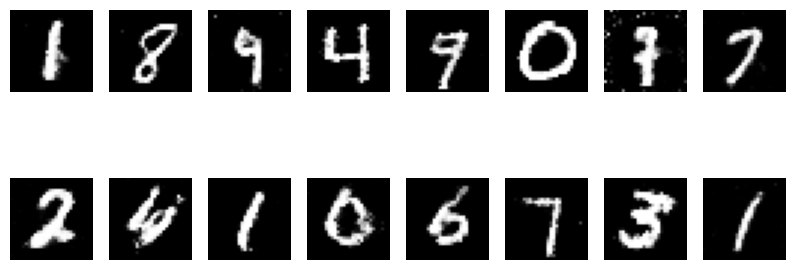

 70%|███████   | 70/100 [43:50<18:54, 37.82s/it]

[Epoch 70/100] [Batch 0/938] [D loss: 1.1047] [G loss: 1.1638]
[Epoch 70/100] [Batch 200/938] [D loss: 1.0975] [G loss: 1.2399]
[Epoch 70/100] [Batch 400/938] [D loss: 1.1285] [G loss: 1.0221]
[Epoch 70/100] [Batch 600/938] [D loss: 1.0985] [G loss: 0.9284]
[Epoch 70/100] [Batch 800/938] [D loss: 1.0599] [G loss: 1.3425]


 71%|███████   | 71/100 [44:28<18:15, 37.76s/it]

[Epoch 71/100] [Batch 0/938] [D loss: 1.0457] [G loss: 1.2442]
[Epoch 71/100] [Batch 200/938] [D loss: 1.1485] [G loss: 1.1857]
[Epoch 71/100] [Batch 400/938] [D loss: 1.2360] [G loss: 1.2560]
[Epoch 71/100] [Batch 600/938] [D loss: 1.0714] [G loss: 1.3374]
[Epoch 71/100] [Batch 800/938] [D loss: 1.0682] [G loss: 0.9829]


 72%|███████▏  | 72/100 [45:06<17:37, 37.75s/it]

[Epoch 72/100] [Batch 0/938] [D loss: 1.0085] [G loss: 1.3530]
[Epoch 72/100] [Batch 200/938] [D loss: 1.1206] [G loss: 1.3136]
[Epoch 72/100] [Batch 400/938] [D loss: 1.0843] [G loss: 1.1630]
[Epoch 72/100] [Batch 600/938] [D loss: 1.0959] [G loss: 1.3479]
[Epoch 72/100] [Batch 800/938] [D loss: 1.2363] [G loss: 1.8608]


 73%|███████▎  | 73/100 [45:43<16:59, 37.75s/it]

[Epoch 73/100] [Batch 0/938] [D loss: 1.0660] [G loss: 1.4385]
[Epoch 73/100] [Batch 200/938] [D loss: 0.9992] [G loss: 1.1306]
[Epoch 73/100] [Batch 400/938] [D loss: 1.0446] [G loss: 1.0836]
[Epoch 73/100] [Batch 600/938] [D loss: 1.0666] [G loss: 1.1644]
[Epoch 73/100] [Batch 800/938] [D loss: 1.0692] [G loss: 1.4684]


 74%|███████▍  | 74/100 [46:21<16:20, 37.73s/it]

[Epoch 74/100] [Batch 0/938] [D loss: 1.1105] [G loss: 1.3655]
[Epoch 74/100] [Batch 200/938] [D loss: 1.1760] [G loss: 0.9288]
[Epoch 74/100] [Batch 400/938] [D loss: 1.0883] [G loss: 1.2877]
[Epoch 74/100] [Batch 600/938] [D loss: 1.0436] [G loss: 1.3336]
[Epoch 74/100] [Batch 800/938] [D loss: 1.3145] [G loss: 1.9165]


 75%|███████▌  | 75/100 [46:59<15:42, 37.71s/it]

[Epoch 75/100] [Batch 0/938] [D loss: 1.1603] [G loss: 1.0884]
[Epoch 75/100] [Batch 200/938] [D loss: 0.9839] [G loss: 1.1975]
[Epoch 75/100] [Batch 400/938] [D loss: 1.0433] [G loss: 1.1664]
[Epoch 75/100] [Batch 600/938] [D loss: 1.1382] [G loss: 1.3820]
[Epoch 75/100] [Batch 800/938] [D loss: 0.9547] [G loss: 1.2856]


 76%|███████▌  | 76/100 [47:37<15:04, 37.70s/it]

[Epoch 76/100] [Batch 0/938] [D loss: 0.9621] [G loss: 1.2285]
[Epoch 76/100] [Batch 200/938] [D loss: 0.9737] [G loss: 1.3321]
[Epoch 76/100] [Batch 400/938] [D loss: 0.9585] [G loss: 1.3849]
[Epoch 76/100] [Batch 600/938] [D loss: 0.9335] [G loss: 1.4516]
[Epoch 76/100] [Batch 800/938] [D loss: 1.1804] [G loss: 1.5902]


 77%|███████▋  | 77/100 [48:14<14:27, 37.70s/it]

[Epoch 77/100] [Batch 0/938] [D loss: 0.9655] [G loss: 1.1982]
[Epoch 77/100] [Batch 200/938] [D loss: 1.0533] [G loss: 0.9490]
[Epoch 77/100] [Batch 400/938] [D loss: 1.0167] [G loss: 1.3158]
[Epoch 77/100] [Batch 600/938] [D loss: 0.9336] [G loss: 1.2558]
[Epoch 77/100] [Batch 800/938] [D loss: 0.9683] [G loss: 1.2530]


 78%|███████▊  | 78/100 [48:52<13:49, 37.69s/it]

[Epoch 78/100] [Batch 0/938] [D loss: 1.0109] [G loss: 1.4151]
[Epoch 78/100] [Batch 200/938] [D loss: 1.0609] [G loss: 1.1144]
[Epoch 78/100] [Batch 400/938] [D loss: 1.0242] [G loss: 1.3069]
[Epoch 78/100] [Batch 600/938] [D loss: 0.8615] [G loss: 1.4240]
[Epoch 78/100] [Batch 800/938] [D loss: 1.0738] [G loss: 1.2972]


 79%|███████▉  | 79/100 [49:29<13:10, 37.66s/it]

[Epoch 79/100] [Batch 0/938] [D loss: 0.9837] [G loss: 1.4480]
[Epoch 79/100] [Batch 200/938] [D loss: 1.0707] [G loss: 1.3370]
[Epoch 79/100] [Batch 400/938] [D loss: 1.0775] [G loss: 1.5667]
[Epoch 79/100] [Batch 600/938] [D loss: 0.9893] [G loss: 1.2109]
[Epoch 79/100] [Batch 800/938] [D loss: 1.1143] [G loss: 1.1864]
Epoch [80/100]  D Loss: 1.0697  G Loss: 1.4727


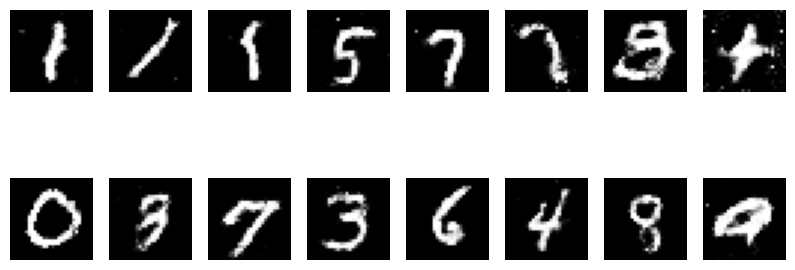

 80%|████████  | 80/100 [50:08<12:37, 37.86s/it]

[Epoch 80/100] [Batch 0/938] [D loss: 1.0765] [G loss: 1.2794]
[Epoch 80/100] [Batch 200/938] [D loss: 1.1128] [G loss: 1.0656]
[Epoch 80/100] [Batch 400/938] [D loss: 0.9722] [G loss: 1.5726]
[Epoch 80/100] [Batch 600/938] [D loss: 1.0452] [G loss: 1.5156]
[Epoch 80/100] [Batch 800/938] [D loss: 1.0144] [G loss: 1.1549]


 81%|████████  | 81/100 [50:45<11:58, 37.80s/it]

[Epoch 81/100] [Batch 0/938] [D loss: 0.9439] [G loss: 1.6585]
[Epoch 81/100] [Batch 200/938] [D loss: 1.1135] [G loss: 1.1715]
[Epoch 81/100] [Batch 400/938] [D loss: 1.1181] [G loss: 1.4167]
[Epoch 81/100] [Batch 600/938] [D loss: 1.1020] [G loss: 1.4838]
[Epoch 81/100] [Batch 800/938] [D loss: 1.1675] [G loss: 1.2048]


 82%|████████▏ | 82/100 [51:23<11:19, 37.73s/it]

[Epoch 82/100] [Batch 0/938] [D loss: 1.1012] [G loss: 1.9467]
[Epoch 82/100] [Batch 200/938] [D loss: 0.9806] [G loss: 1.4089]
[Epoch 82/100] [Batch 400/938] [D loss: 1.0896] [G loss: 1.1333]
[Epoch 82/100] [Batch 600/938] [D loss: 1.0335] [G loss: 1.3732]
[Epoch 82/100] [Batch 800/938] [D loss: 1.0715] [G loss: 0.9478]


 83%|████████▎ | 83/100 [52:01<10:41, 37.72s/it]

[Epoch 83/100] [Batch 0/938] [D loss: 0.8973] [G loss: 1.9088]
[Epoch 83/100] [Batch 200/938] [D loss: 1.0542] [G loss: 1.0147]
[Epoch 83/100] [Batch 400/938] [D loss: 1.0001] [G loss: 1.5305]
[Epoch 83/100] [Batch 600/938] [D loss: 1.0194] [G loss: 1.3911]
[Epoch 83/100] [Batch 800/938] [D loss: 1.0390] [G loss: 1.4399]


 84%|████████▍ | 84/100 [52:38<10:02, 37.67s/it]

[Epoch 84/100] [Batch 0/938] [D loss: 1.1489] [G loss: 0.8362]
[Epoch 84/100] [Batch 200/938] [D loss: 1.1360] [G loss: 0.8216]
[Epoch 84/100] [Batch 400/938] [D loss: 0.9392] [G loss: 1.3638]
[Epoch 84/100] [Batch 600/938] [D loss: 0.9346] [G loss: 1.6044]
[Epoch 84/100] [Batch 800/938] [D loss: 1.0777] [G loss: 0.9285]


 85%|████████▌ | 85/100 [53:16<09:24, 37.66s/it]

[Epoch 85/100] [Batch 0/938] [D loss: 1.0781] [G loss: 0.9379]
[Epoch 85/100] [Batch 200/938] [D loss: 1.1248] [G loss: 1.3035]
[Epoch 85/100] [Batch 400/938] [D loss: 1.0568] [G loss: 1.1858]
[Epoch 85/100] [Batch 600/938] [D loss: 1.0641] [G loss: 1.3393]
[Epoch 85/100] [Batch 800/938] [D loss: 1.1289] [G loss: 1.1530]


 86%|████████▌ | 86/100 [53:53<08:46, 37.62s/it]

[Epoch 86/100] [Batch 0/938] [D loss: 1.0411] [G loss: 1.2409]
[Epoch 86/100] [Batch 200/938] [D loss: 1.0020] [G loss: 1.1214]
[Epoch 86/100] [Batch 400/938] [D loss: 1.1330] [G loss: 1.1977]
[Epoch 86/100] [Batch 600/938] [D loss: 1.0082] [G loss: 1.3494]
[Epoch 86/100] [Batch 800/938] [D loss: 1.0034] [G loss: 1.6122]


 87%|████████▋ | 87/100 [54:31<08:08, 37.60s/it]

[Epoch 87/100] [Batch 0/938] [D loss: 1.1035] [G loss: 1.3415]
[Epoch 87/100] [Batch 200/938] [D loss: 1.0332] [G loss: 1.5043]
[Epoch 87/100] [Batch 400/938] [D loss: 1.1727] [G loss: 1.5170]
[Epoch 87/100] [Batch 600/938] [D loss: 1.1393] [G loss: 0.9626]
[Epoch 87/100] [Batch 800/938] [D loss: 1.0372] [G loss: 1.0750]


 88%|████████▊ | 88/100 [55:09<07:30, 37.58s/it]

[Epoch 88/100] [Batch 0/938] [D loss: 1.0949] [G loss: 1.2957]
[Epoch 88/100] [Batch 200/938] [D loss: 0.9922] [G loss: 1.3345]
[Epoch 88/100] [Batch 400/938] [D loss: 1.0430] [G loss: 1.6220]
[Epoch 88/100] [Batch 600/938] [D loss: 1.0799] [G loss: 1.2837]
[Epoch 88/100] [Batch 800/938] [D loss: 1.0255] [G loss: 1.3334]


 89%|████████▉ | 89/100 [55:46<06:53, 37.56s/it]

[Epoch 89/100] [Batch 0/938] [D loss: 1.0979] [G loss: 1.4093]
[Epoch 89/100] [Batch 200/938] [D loss: 0.8917] [G loss: 1.5115]
[Epoch 89/100] [Batch 400/938] [D loss: 1.0793] [G loss: 1.1864]
[Epoch 89/100] [Batch 600/938] [D loss: 1.1176] [G loss: 0.9336]
[Epoch 89/100] [Batch 800/938] [D loss: 0.9954] [G loss: 1.7661]
Epoch [90/100]  D Loss: 1.1140  G Loss: 1.3161


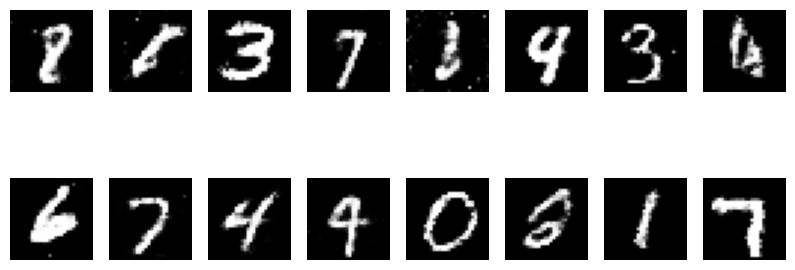

 90%|█████████ | 90/100 [56:24<06:16, 37.62s/it]

[Epoch 90/100] [Batch 0/938] [D loss: 1.3003] [G loss: 1.6811]
[Epoch 90/100] [Batch 200/938] [D loss: 0.9724] [G loss: 1.4251]
[Epoch 90/100] [Batch 400/938] [D loss: 1.1053] [G loss: 1.5375]
[Epoch 90/100] [Batch 600/938] [D loss: 1.1709] [G loss: 1.3707]
[Epoch 90/100] [Batch 800/938] [D loss: 1.0627] [G loss: 1.3845]


 91%|█████████ | 91/100 [57:01<05:38, 37.64s/it]

[Epoch 91/100] [Batch 0/938] [D loss: 1.0542] [G loss: 1.2419]
[Epoch 91/100] [Batch 200/938] [D loss: 1.0019] [G loss: 1.2584]
[Epoch 91/100] [Batch 400/938] [D loss: 1.1325] [G loss: 1.4540]
[Epoch 91/100] [Batch 600/938] [D loss: 1.0503] [G loss: 1.2113]
[Epoch 91/100] [Batch 800/938] [D loss: 1.1874] [G loss: 1.8498]


 92%|█████████▏| 92/100 [57:39<05:00, 37.58s/it]

[Epoch 92/100] [Batch 0/938] [D loss: 1.1114] [G loss: 1.8768]
[Epoch 92/100] [Batch 200/938] [D loss: 1.1542] [G loss: 1.6940]
[Epoch 92/100] [Batch 400/938] [D loss: 1.2000] [G loss: 1.1399]
[Epoch 92/100] [Batch 600/938] [D loss: 1.1552] [G loss: 1.6400]
[Epoch 92/100] [Batch 800/938] [D loss: 1.1175] [G loss: 1.8606]


 93%|█████████▎| 93/100 [58:16<04:23, 37.58s/it]

[Epoch 93/100] [Batch 0/938] [D loss: 1.0409] [G loss: 1.3829]
[Epoch 93/100] [Batch 200/938] [D loss: 1.1882] [G loss: 0.9379]
[Epoch 93/100] [Batch 400/938] [D loss: 1.0639] [G loss: 1.2357]
[Epoch 93/100] [Batch 600/938] [D loss: 1.0381] [G loss: 1.4501]
[Epoch 93/100] [Batch 800/938] [D loss: 0.8816] [G loss: 1.5597]


 94%|█████████▍| 94/100 [58:54<03:45, 37.55s/it]

[Epoch 94/100] [Batch 0/938] [D loss: 0.9995] [G loss: 1.4994]
[Epoch 94/100] [Batch 200/938] [D loss: 1.1289] [G loss: 1.6571]
[Epoch 94/100] [Batch 400/938] [D loss: 0.9732] [G loss: 1.2732]
[Epoch 94/100] [Batch 600/938] [D loss: 1.0208] [G loss: 1.3786]
[Epoch 94/100] [Batch 800/938] [D loss: 1.0330] [G loss: 1.4735]


 95%|█████████▌| 95/100 [59:31<03:07, 37.53s/it]

[Epoch 95/100] [Batch 0/938] [D loss: 1.0217] [G loss: 1.2585]
[Epoch 95/100] [Batch 200/938] [D loss: 1.0413] [G loss: 1.2279]
[Epoch 95/100] [Batch 400/938] [D loss: 1.0425] [G loss: 1.0616]
[Epoch 95/100] [Batch 600/938] [D loss: 1.0436] [G loss: 1.4042]
[Epoch 95/100] [Batch 800/938] [D loss: 1.0357] [G loss: 1.2140]


 96%|█████████▌| 96/100 [1:00:09<02:30, 37.59s/it]

[Epoch 96/100] [Batch 0/938] [D loss: 1.0576] [G loss: 1.7082]
[Epoch 96/100] [Batch 200/938] [D loss: 1.1366] [G loss: 1.2390]
[Epoch 96/100] [Batch 400/938] [D loss: 0.9704] [G loss: 1.5869]
[Epoch 96/100] [Batch 600/938] [D loss: 1.1943] [G loss: 1.0198]
[Epoch 96/100] [Batch 800/938] [D loss: 0.9540] [G loss: 1.2964]


 97%|█████████▋| 97/100 [1:00:47<01:52, 37.59s/it]

[Epoch 97/100] [Batch 0/938] [D loss: 1.0073] [G loss: 1.4077]
[Epoch 97/100] [Batch 200/938] [D loss: 1.0892] [G loss: 1.1338]
[Epoch 97/100] [Batch 400/938] [D loss: 1.0145] [G loss: 1.3127]
[Epoch 97/100] [Batch 600/938] [D loss: 0.9374] [G loss: 1.1141]
[Epoch 97/100] [Batch 800/938] [D loss: 0.9841] [G loss: 1.2208]


 98%|█████████▊| 98/100 [1:01:24<01:15, 37.55s/it]

[Epoch 98/100] [Batch 0/938] [D loss: 1.0938] [G loss: 1.0998]
[Epoch 98/100] [Batch 200/938] [D loss: 0.9890] [G loss: 1.1213]
[Epoch 98/100] [Batch 400/938] [D loss: 1.0107] [G loss: 1.2601]
[Epoch 98/100] [Batch 600/938] [D loss: 0.9734] [G loss: 1.3834]
[Epoch 98/100] [Batch 800/938] [D loss: 1.0173] [G loss: 1.2365]


 99%|█████████▉| 99/100 [1:02:02<00:37, 37.53s/it]

[Epoch 99/100] [Batch 0/938] [D loss: 1.0698] [G loss: 1.6157]
[Epoch 99/100] [Batch 200/938] [D loss: 0.9845] [G loss: 1.6365]
[Epoch 99/100] [Batch 400/938] [D loss: 1.0356] [G loss: 1.3487]
[Epoch 99/100] [Batch 600/938] [D loss: 1.0801] [G loss: 1.2652]
[Epoch 99/100] [Batch 800/938] [D loss: 1.2136] [G loss: 1.1676]
Epoch [100/100]  D Loss: 1.1830  G Loss: 1.3631


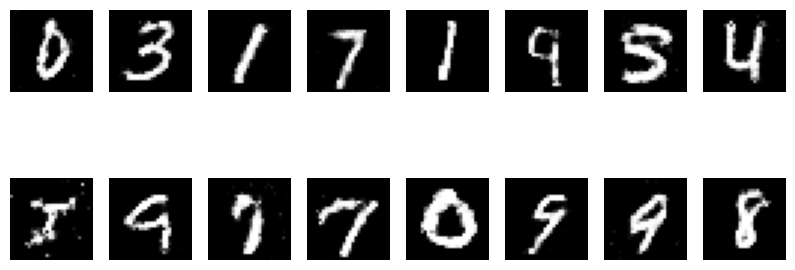

100%|██████████| 100/100 [1:02:40<00:00, 37.60s/it]


In [ ]:
from tqdm import tqdm


# 손실 추적용 리스트
g_losses = []
d_losses = []

for epoch in tqdm(range(epochs)):
  for i, (imgs, _) in enumerate(dataloader):
    real_imgs = imgs.to(device)
    batch_size = real_imgs.size(0)

    # 진짜와 가짜 레이블 설정
    valid = torch.ones(batch_size, 1).to(device)
    fake = torch.zeros(batch_size, 1).to(device)

    # ---------------------
    #  판별자 학습
    # ---------------------
    optimizer_D.zero_grad()

    # 진짜 이미지에 대한 손실
    real_loss = criterion(discriminator(real_imgs), valid)

    # 가짜 이미지에 대한 손실
    z = torch.randn(batch_size, latent_dim).to(device)
    fake_imgs = generator(z)
    fake_loss = criterion(discriminator(fake_imgs.detach()), fake)

    # 판별자 총 손실
    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()

    # ---------------------
    #  생성자 학습
    # ---------------------
    optimizer_G.zero_grad()

    # 생성자가 판별자를 속이도록 학습
    g_loss = criterion(discriminator(fake_imgs), valid)
    g_loss.backward()
    optimizer_G.step()

    # 손실 저장
    g_losses.append(g_loss.item())
    d_losses.append(d_loss.item())

    # 로그 출력
    if i % 200 == 0:
        print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
      # 주기적으로 생성된 이미지 시각화

  if (epoch + 1) % 10 == 0:
      print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")
      noise = torch.randn(16, latent_dim)
      fake_images = generator(noise).detach()
      fake_images = fake_images.view(-1, 1, 28, 28).cpu().numpy()

      fig, axs = plt.subplots(2, 8, figsize=(10, 4))
      for j, ax in enumerate(axs.flatten()):
          ax.imshow(fake_images[j, 0], cmap='gray')
          ax.axis('off')
      plt.show()

# 손실 함수 트렌드 시각화
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Loss Trends")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
from google.colab import runtime
runtime.unassign()